In [1]:
import numpy as np

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from interactive_coloring.models.regionSelecter import RandomRegionSelecter
from interactive_coloring.models.segmenter import SimpleSegmenter
from interactive_coloring.models.colorizer import CldmColorizer
from interactive_coloring.processing import preprocess_lineart

/hdd1/aidml/sjwi/interactiveColoring/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


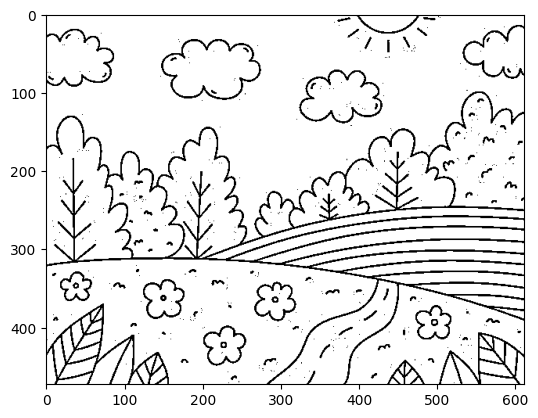

In [2]:
img = cv2.imread('./assets/lineart0.jpg')
map_color = np.zeros_like(img)
lineart = preprocess_lineart(img)

plt.imshow(lineart, cmap='gray')

### [Segmenter]: Interacive 컬러링을 위해 line art의 영역 분할

In [3]:
# opencv를 사용한 간단한 Segmenter 클래스
segmenter = SimpleSegmenter()

n_labels:  73


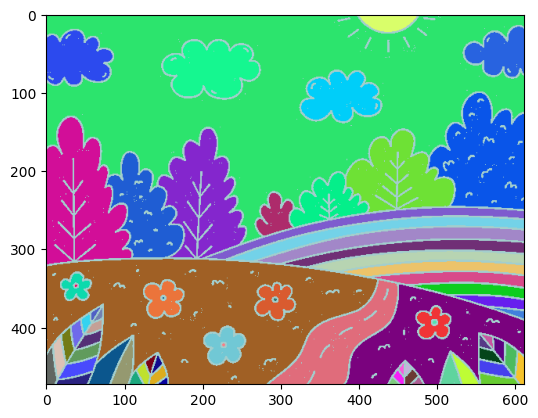

In [4]:
# lineart의 각 영역을 분할, 라벨링
n_labels, map = segmenter(lineart)

# segmentation map 확인을 위해 각 라벨마다 랜덤 컬러를 부여
for i in range(n_labels):
    map_color[map==i] = [int(j) for j in np.random.randint(0,255,3)]

print("n_labels: ", n_labels)
plt.imshow(map_color)

### [RegionSelecter]: 다음 컬러링할 영역을 선택

In [5]:
# Uncolored region 중 하나를 랜덤으로 골라 target으로 결정하는 클래스
regionSelecter = RandomRegionSelecter()

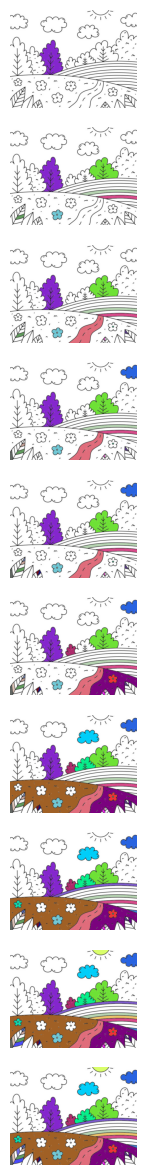

In [6]:
# 순차척 컬러링 테스트해보기
# segmentation 이후 각 영역을 차례로 색칠해나가는 과정 확인(컬러는 랜덤, 컬러링 모델은 아직 적용 X)
n = 50
fig, axes = plt.subplots(10, 1)
fig.set_size_inches(20, 15)

for i in range(n):
    # 매 iter마다 uncolored region 중 한 영역을 정해 target mask 생성
    target_mask = regionSelecter.decide_next(img, map)
    # Target mask에 해당하는 부분만 coloring
    img[target_mask>0.5] = map_color[target_mask>0.5]
    # 시각화
    if i % 5 == 0:
        axes[i//5].axis('off')
        axes[i//5].imshow(img)
        cv2.imwrite('img.png', img)

### [Colorizer]: Target mask를 색칠

In [7]:
# Not implemented yet
colorizer = CldmColorizer()

TypeError: __init__() missing 4 required positional arguments: 'model', 'sampler', 'n_steps', and 'resolution'